# Ant Colony System for the TSP
## Mauro Gentile - Peter Buttaroni


### Final porject Artificial Intelligence
### Academic year 2020

#### Libraries import

In [1]:
from imports.download import download_AI_library
download_AI_library()

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from imports.scripts import *
from imports.ACS import ACS
from imports.utils import *
from imports.video_utils import *

from AI2020.IO_manager.io_tsp import TSP_Instance_Creator
%matplotlib inline

#### Scenarios variable

In [2]:
# dictionary of TSP problem instances
problem_istances={0:'eil76.tsp',
                 1:'d198.tsp',
                 2:'rat783.tsp',
                 3:'fl1577.tsp'}

#### Battery of simulations

In [3]:
#definition of the list of parameters for the battery of simulations
problems=[0,1,2,3]
seeds = [0,1,2]
time_limits = [180]  
cl_bools = ["Y", "N"]
qs = ["0.0","0.5","0.9", "1-13/n"]


In [4]:
#simulation run 
df = run_simulations(problems,seeds,time_limits,cl_bools,qs,problem_istances)
df

,Problem,Time limit,CL,q0,seed,Best lenght found,Gap,Iterations done
0,1,180,20,0,2,16176,0.025,245
1,1,180,20,0.5,2,16134,0.022,281
2,1,180,20,0.98,2,15849,0.004,487
3,1,180,20,1-13/n,2,15957,0.011,350
4,1,180,n.a.,0,2,16299,0.033,226
...,...,...,...,...,...,...,...,...
91,0,180,20,1-13/n,2,538,0.000,1439
92,0,180,n.a.,0,2,555,0.032,918
93,0,180,n.a.,0.5,2,554,0.030,1137
94,0,180,n.a.,0.98,2,546,0.015,1848


#### One shot scenario

In [5]:
# set the parameters of a one scenario only and run it
parameters = parameters_dict(ants_no = 10,
                           p_instance = 0,
                           seed = 0,
                           time_limit = 180,
                           cl_bool = "Y",
                           ql0 = "1-13/n",
                           problem_istances = problem_istances)

acs = ACS(parameters)
acs.run()

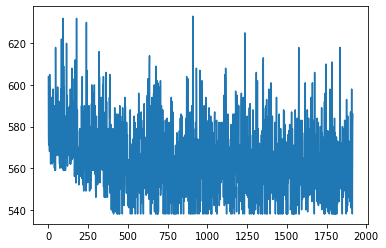

                     Problem:  eil76.tsp
                Relative gap:  0.0 %
                  Iterations:  1915
                          q0:  1-13/n
                Ramp of ants:  False
      Initial number of ants:  10
     Randomic movement order:  True





In [6]:
#plot  results
plt.plot(acs.best_tours_length)
plt.show()
offset = 30
print('Problem: '.rjust(offset, " "), problem_istances[parameters['prob_no']])
print('Relative gap: '.rjust(offset, " "), (np.min(acs.global_best_tour_length)/ parameters['instance'].best_sol - 1) * 100, '%')
print('Iterations: '.rjust(offset, " "),  acs.iteration)
print('q0: '.rjust(offset, " "),  parameters["q0"]["label"])
print('Ramp of ants: '.rjust(offset, " "),  parameters["ramp"])
print('Initial number of ants: '.rjust(offset, " "),  parameters["m"])
if parameters["ramp"]:
    print('Final number of ants: '.rjust(offset, " "),  acs.m)
print('Randomic movement order: '.rjust(offset, " "), parameters['random'])
print('\n\n')

#### Video

In [7]:
# definition of one simulation to make video.
# plot MUST be set to True to save the necessary info
parameters = parameters_dict(ants_no = 10,
                           p_instance = 0,
                           seed = 0,
                           time_limit = 180,
                           cl_bool = "Y",
                           ql0 = "1-13/n",
                           problem_istances = problem_istances,
                           plot = True)


acs = ACS(parameters)
acs.run()


Starting video: ANT TRACKING 
we are currently at step:  0
we are currently at step:  0
we are currently at step:  100
we are currently at step:  200
we are currently at step:  300


t:   7%|▋         | 21/304 [00:00<00:01, 209.94it/s, now=None]

Moviepy - Building video results/20201221_115248/video/ant_tour.mp4.
Moviepy - Writing video results/20201221_115248/video/ant_tour.mp4



Moviepy - Done !
Moviepy - video ready results/20201221_115248/video/ant_tour.mp4

Starting video: PEHROMONE 
we are currently at step:  0
we are currently at step:  0
we are currently at step:  100
we are currently at step:  200
we are currently at step:  300
we are currently at step:  400
we are currently at step:  500
we are currently at step:  600
we are currently at step:  700
we are currently at step:  800
we are currently at step:  900
we are currently at step:  1000
we are currently at step:  1100
we are currently at step:  1200
we are currently at step:  1300
we are currently at step:  1400
we are currently at step:  1500
we are currently at step:  1600
we are currently at step:  1700


t:   2%|▏         | 34/1941 [00:00<00:05, 337.61it/s, now=None]

Moviepy - Building video results/20201221_115248/video/pheromone_times_eta.mp4.
Moviepy - Writing video results/20201221_115248/video/pheromone_times_eta.mp4



Moviepy - Done !
Moviepy - video ready results/20201221_115248/video/pheromone_times_eta.mp4

Starting video: BEST TOURS 
we are currently at step:  0
we are currently at step:  0


t:  36%|███▌      | 5/14 [00:00<00:00, 37.43it/s, now=None]

Moviepy - Building video results/20201221_115248/video/best_tour_evolution.mp4.
Moviepy - Writing video results/20201221_115248/video/best_tour_evolution.mp4



Moviepy - Done !
Moviepy - video ready results/20201221_115248/video/best_tour_evolution.mp4


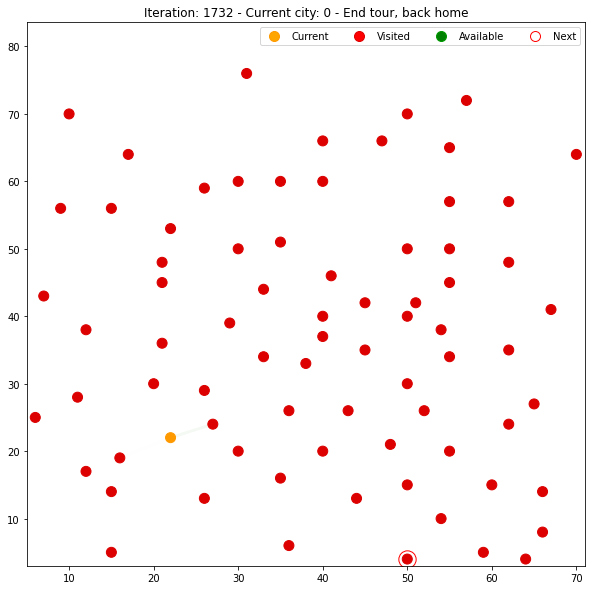

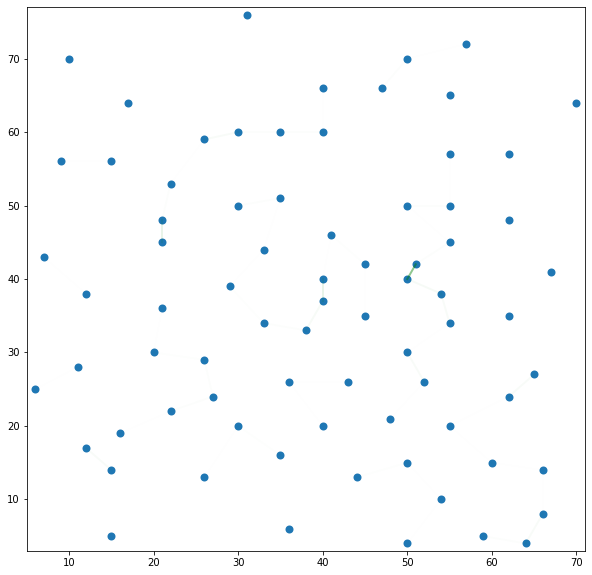

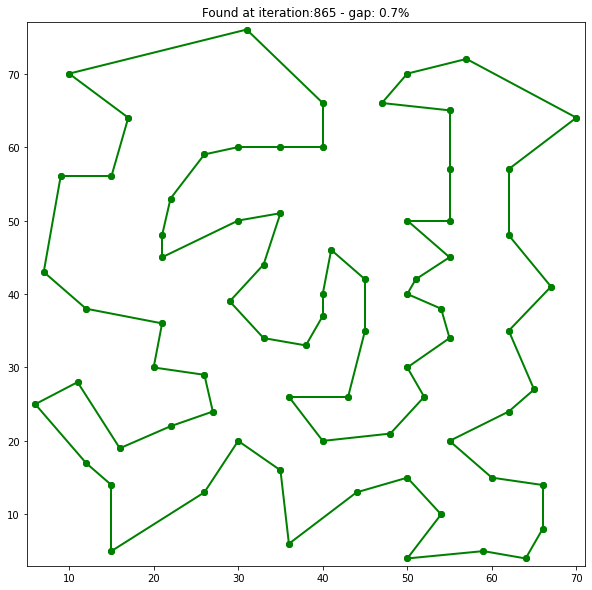

In [8]:
results_folder = create_root_folder_name()
print("\nStarting video: ANT TRACKING ")
ant_tracking(acs, results_folder,[0,acs.iteration//4,acs.iteration//2, acs.iteration-1],2)
print("\nStarting video: PEHROMONE ")
pheromone_times_eta_video(acs, video_lenght = 60, ant_no = 0,results_folder = results_folder)
print("\nStarting video: BEST TOURS ")
best_tours_video(acs,results_folder, fps=0.3)